In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import missingno as msno 

dashes = dashes='---'*20

import warnings
warnings.filterwarnings("ignore")

In [2]:
"""
amount_tsh : Total static head (amount water available to waterpoint)
date_recorded : The date the row was entered
funder : Who funded the well
gps_height : Altitude of the well
installer : Organization that installed the well
longitude : GPS coordinate
latitude : GPS coordinate
wpt_name : Name of the waterpoint if there is one
num_private :Private use or not
basin : Geographic water basin
subvillage : Geographic location
region : Geographic location
region_code : Geographic location (coded)
district_code : Geographic location (coded)
lga : Geographic location
ward : Geographic location
population : Population around the well
public_meeting : True/False
recorded_by : Group entering this row of data
scheme_management : Who operates the waterpoint
scheme_name : Who operates the waterpoint
permit : If the waterpoint is permitted
construction_year : Year the waterpoint was constructed
extraction_type : The kind of extraction the waterpoint uses
extraction_type_group : The kind of extraction the waterpoint uses
extraction_type_class : The kind of extraction the waterpoint uses
management : How the waterpoint is managed
management_group : How the waterpoint is managed
payment : What the water costs
payment_type : What the water costs
water_quality : The quality of the water
quality_group : The quality of the water
quantity : The quantity of water
quantity_group : The quantity of water
source : The source of the water
source_type : The source of the water
source_class : The source of the water
waterpoint_type : The kind of waterpoint
waterpoint_type_group : The kind of waterpoint"""



pd.set_option('display.max_columns', None)  
df_1 = pd.read_csv('data/water_table.csv')
labels = pd.read_csv('data/water_table_labels.csv')
df_1['target'] = labels['status_group']

In [3]:
df_1['target'] = df_1['target'].map({'functional':0,'non functional':1,'functional needs repair':2})
df_1.drop('id',axis=1, inplace=True)

In [4]:

df_1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


In [5]:
df_1.shape

(59400, 40)

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [7]:
df_1.nunique()

amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity

In [8]:
"""
Feature contain similar representation of data:
extraction_type
extraction_type_group
extraction_type_class 

(payment, payment_type),

(water_quality, quality_group), 

(source, source_class), 

(subvillage, region, region_code, district_code, lga, ward), 

(waterpoint_type, waterpoint_type_group)  
Risk overfitting our data during training by including all the features in our analysis, which can be dropped.

id can be droped because it is unique for each instance.
num_private is ~99% zeros



"""
print('Features which may be duplicative')

Features which may be duplicative


In [9]:
"""
some of the features that seemed would impact predcition of whethe wells functions based on intuition. 
amount_tsh (amount of water available to water point)
gps_height, basin, installer, population, scheme_management, construction year, extraction_type, management_group, water_quality, payment type, source, and waterpoint_type seemed like they could be extremely important in identifying the pump status.



"""

'\nsome of the features that seemed would impact predcition of whethe wells functions based on intuition. \namount_tsh (amount of water available to water point)\ngps_height, basin, installer, population, scheme_management, construction year, extraction_type, management_group, water_quality, payment type, source, and waterpoint_type seemed like they could be extremely important in identifying the pump status.\n\n\n\n'

#### funder 
Column 'funder' is defined as who funded the well.<br>
Nan values: 3635<br>
'0': 777<br>
categories that have unique values of 10 or less: 3001<br> 
<br>
Categories with unique values of 10 or less were grouped in category titled 'other'<br>

In [10]:
"""
funder                    1897
installer                 2145


NaN: 3635
'0': 777
"""
df_1['funder'].value_counts(dropna=False)

Government Of Tanzania    9084
NaN                       3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Usambala Sister              1
Seronera                     1
Bukwang Church Saints        1
Kizego Jumaa                 1
Stephano                     1
Name: funder, Length: 1898, dtype: int64

In [11]:
len(df_1[df_1['funder']== '0'])

777

In [12]:
df_a = df_1.copy()

In [13]:
#df_a = df_a.apply(lambda x: x.mask(x.map(x.value_counts())< 10, np.NaN) if x.name=='funder' else x)
#funder
#df_1['funder'].loc[(df_1['funder'] == '0')] = np.NaN
df_1.loc[(df_1['funder'] == '0'),'funder'] = np.NaN

In [14]:
"""
NaN: 3635
"""
df_1['funder'].value_counts(dropna=False)

Government Of Tanzania    9084
NaN                       4412
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Usambala Sister              1
Seronera                     1
Bukwang Church Saints        1
Kizego Jumaa                 1
Stephano                     1
Name: funder, Length: 1897, dtype: int64

In [15]:
df_1[df_1['funder']== '0']

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target


In [16]:
df_1 = df_1.apply(lambda x: x.mask(x.map(x.value_counts())< 10, 'other') if x.name=='funder' else x)

In [17]:
df_1['funder'].value_counts(dropna=False)

Government Of Tanzania    9084
NaN                       4412
Danida                    3114
other                     3001
Hesawa                    2202
                          ... 
Sijm                        10
De                          10
Tasafu                      10
Muslims                     10
Belgian Government          10
Name: funder, Length: 407, dtype: int64

#### installer
Column 'installer' is defined as the organization that installed the well.<br>
unique values: 2145<br>
NaN: 3655<br>
'0': 777<br>
<br>
categories of unique values with a count of 10 or less were grouped in a category called 'other'.<br> 

In [18]:
"""
installer unique: 2145

NaN: 3655
0:   777

"""
df_1['installer'].value_counts(dropna=False)

DWE                        17402
NaN                         3655
Government                  1825
RWE                         1206
Commu                       1060
                           ...  
Rotary club kitchener          1
Action Aid                     1
KDC                            1
IS                             1
DWE/Ubalozi wa Marekani        1
Name: installer, Length: 2146, dtype: int64

In [19]:
len(df_1[df_1['installer']=='0'])

777

In [20]:
df_1['installer'].loc[(df_1['installer'] == '0')] = np.NaN

In [21]:
#pd.set_option('display.max_rows', None)
#counting = df_1['installer'].value_counts()
df_1 = df_1.apply(lambda x: x.mask(x.map(x.value_counts())< 10, 'other') if x.name=='installer' else x)

In [22]:
df_1['installer'].value_counts()

DWE                       17402
other                      3533
Government                 1825
RWE                        1206
Commu                      1060
                          ...  
Rips                         10
CHINA HENAN CONTRACTOR       10
secondary                    10
Gwaseco                      10
KMCL                         10
Name: installer, Length: 423, dtype: int64

#### scheme_management / scheme_name
scheme_management : Who operates the waterpoint<br>
scheme_name : Who operates the waterpoint<br>

In [23]:
df_1['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [24]:
df_1['extraction_type_class'].value_counts(dropna=False)

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

#### region / region_code
region and region_code are essentially the same columns.  region_code is numeric.<br>
NaN: 0<br>

In [25]:
df_1['region'].value_counts(dropna=False)

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [26]:
df_1['region_code'].value_counts(dropna=False)

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

#### extraction_type / extraction_type_group / extraction_type_class
Defined as The kind of extraction the waterpoint uses.

In [27]:
df_1['extraction_type'].value_counts(dropna=False)

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [28]:
df_1['extraction_type_group'].value_counts(dropna=False)

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [29]:
df_1['extraction_type_class'].value_counts(dropna=False)

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [30]:
#problems: 'scheme_management','lga'
cols = ['amount_tsh','longitude','latitude','num_private','basin','region','district_code','population',
        'public_meeting','recorded_by','permit','construction_year','extraction_type_group','management','management_group','payment',
        'payment_type', 'quality_group','quantity','source','waterpoint_type','target']   
data_df = df_1[cols]

In [31]:
data_df.head()

,amount_tsh,longitude,latitude,num_private,basin,region,district_code,population,public_meeting,recorded_by,permit,construction_year,extraction_type_group,management,management_group,payment,payment_type,quality_group,quantity,source,waterpoint_type,target
0,6000.0,34.938093,-9.856322,0,Lake Nyasa,Iringa,5,109,True,GeoData Consultants Ltd,False,1999,gravity,vwc,user-group,pay annually,annually,good,enough,spring,communal standpipe,0
1,0.0,34.698766,-2.147466,0,Lake Victoria,Mara,2,280,NaN,GeoData Consultants Ltd,True,2010,gravity,wug,user-group,never pay,never pay,good,insufficient,rainwater harvesting,communal standpipe,0
2,25.0,37.460664,-3.821329,0,Pangani,Manyara,4,250,True,GeoData Consultants Ltd,True,2009,gravity,vwc,user-group,pay per bucket,per bucket,good,enough,dam,communal standpipe multiple,0
3,0.0,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,63,58,True,GeoData Consultants Ltd,True,1986,submersible,vwc,user-group,never pay,never pay,good,dry,machine dbh,communal standpipe multiple,1
4,0.0,31.130847,-1.825359,0,Lake Victoria,Kagera,1,0,True,GeoData Consultants Ltd,True,0,gravity,other,other,never pay,never pay,good,seasonal,rainwater harvesting,communal standpipe,0


In [32]:
data_df.shape

(59400, 22)

0    32259
1    22824
2     4317
Name: target, dtype: int64


0    0.543
1    0.384
2    0.073
Name: target, dtype: float64
---------------------------------------------


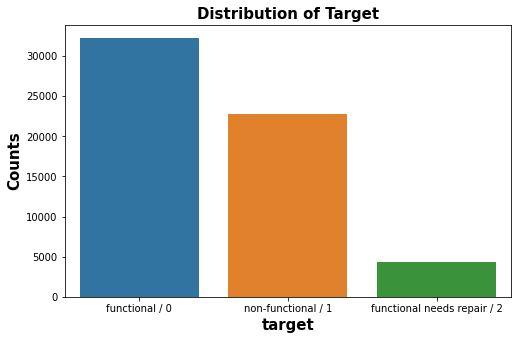

In [33]:
def feature_distribution(data, col = None,ticklabels=None, figsize=None):
    """
    plots a seaborn distplot for column w/customization
    Args
    df (df)
    col (int)
    hist_kws (dict)
    figsize (dict)
    
    """
    print(data[col].value_counts(dropna=False))
    print('\n')
    print(round(data[col].value_counts(normalize=True),3))
    dashes = dashes='---'*15
    print(dashes)
    
#     if hist_kws == None:
#         {'alpha':0.5,'edgecolor':'black'}

    #order = pd.crosstab(data[col].sort_values('Classic', ascending=False).index

    fig,ax = plt.subplots(figsize=figsize)
    sns.countplot(data[col], ax=ax)

    label_font = {'weight':'bold','size':15}
    ax.set_ylabel('Counts',fontdict=label_font)
    ax.set_xlabel(col,fontdict=label_font)
    ax.set_title(f'Distribution of {col.title()}',fontdict=label_font)
    ax.set_xticklabels(ticklabels)

feature_distribution(data_df, col='target', ticklabels=['functional / 0','non-functional / 1','functional needs repair / 2'],figsize=(8,5))

### Management / scheme_management columns
The columns management and scheme-management are essentially the same columns.  The difference is that scheme_management has 3,877 missing values and management has no missing values.  I deleted the schemen management columns and kept the management column.  Column 'management_group' are both defined as 'How the waterpoint is managed'so they serve the same purpose, but management has fewer categories that are more general. 

In [34]:
df_1['management'].value_counts(dropna=False)

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [35]:
"""
NaN: 3877
"""
df_1['scheme_management'].value_counts(dropna=False)

VWC                 36793
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [36]:
df_1['management_group'].value_counts(dropna=False)

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [37]:
df_1.groupby(['management_group','management']).count() 

amount_tsh  date_recorded  funder  \
management_group management                                            
commercial       company                  685            685     662   
                 private operator        1971           1971    1746   
                 trust                     78             78      78   
                 water authority          904            904     836   
other            other                    844            844     836   
                 other - school            99             99       0   
parastatal       parastatal              1768           1768    1557   
unknown          unknown                  561            561     527   
user-group       vwc                    40507          40507   37463   
                 water board             2933           2933    2715   
                 wua                     2535           2535    2307   
                 wug                     6515           6515    6261   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        662        685       685   
                 private operator        1971       1748       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        836        904       904   
other            other                    844        830        844       844   
                 other - school            99          0         99        99   
parastatal       parastatal              1768       1559       1768      1768   
unknown          unknown                  561        521        561       561   
user-group       vwc                    40507      37461      40507     40507   
                 water board             2933       2714       2933      2933   
                 wua                     2535       2308       2535      2535   
                 wug                     6515       6251       6515      6515   

                                   wpt_name  num_private  basin  subvillage  \
management_group management                                                   
commercial       company                685          685    685         685   
                 private operator      1971         1971   1971        1932   
                 trust                   78           78     78          78   
                 water authority        904          904    904         895   
other            other                  844          844    844         839   
                 other - school          99           99     99          99   
parastatal       parastatal            1768         1768   1768        1768   
unknown          unknown                561          561    561         561   
user-group       vwc                  40507        40507  40507       40189   
                 water board           2933         2933   2933        2933   
                 wua                   2535         2535   2535        2535   
                 wug                   6515         6515   6515        6515   

                                   region  region_code  district_code    lga  \
management_group management                                                    
commercial       company              685          685            685    685   
                 private operator    1971         1971           1971   1971   
                 trust                 78           78             78     78   
                 water authority      904          904            904    904   
other            other                844          844            844    844   
                 other - school        99           99             99     99   
parastatal       parastatal          1768         1768           1768   1768   
unknown          unknown              561          561          

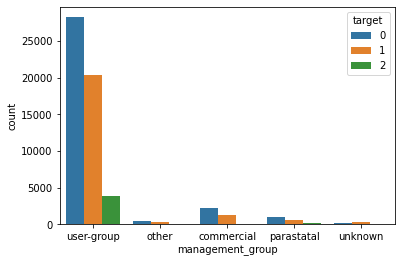

In [38]:
sns.countplot(x='management_group',data=df_1, hue='target');

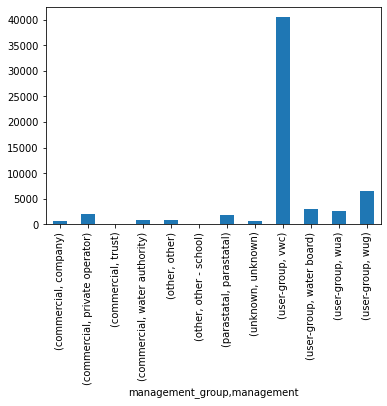

In [39]:
df_1.groupby(['management_group','management']).count()['target'].plot(kind='bar')

#### water_quality / quality_group
Both columns are defined as the quality of the water. Both columns have an category 'unknown' which constitutes 3% of the feature.<br>
I kept quality_group becuase it more specifically defines water quality.

In [40]:
df_1['water_quality'].value_counts(dropna=False)

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [41]:
df_1['water_quality'].value_counts(normalize=True)

soft                  0.855522
salty                 0.081751
unknown               0.031582
milky                 0.013535
coloured              0.008249
salty abandoned       0.005707
fluoride              0.003367
fluoride abandoned    0.000286
Name: water_quality, dtype: float64

In [42]:
df_1['quality_group'].value_counts(dropna=False)

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

#### quantity / quantity_group
Both columns are defined as the quantity of water.  The columns are duplicative.  I kept the column 'quantity'.

In [43]:
df_1['quantity'].value_counts(dropna=False)

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [44]:
df_1['quantity_group'].value_counts(dropna=False)

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

#### source / source_type / source_class 
Columns 'source', 'source_type' and 'source_class' are  defined as the source of the water.<br>
Only keep 'source' b/c it includes the categories of hte others.<br>

In [45]:
"""
source : The source of the water
source_type : The source of the water
source_class : The source of the water

"""
df_1['source'].value_counts(dropna=False)

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [46]:
df_1['source_type'].value_counts(dropna=False)

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [47]:
df_1['source_class'].value_counts(dropna=False)

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

#### waterpoint_type / waterpoint_type_group
Both columns 'waterpoint_type' and 'waterpoint_type_group' are defined as the kind of waterpoint.  Both columns appear to be duplicative.  I am keeping waterpoint_type because it breaks down the categories a little more.<br>

In [48]:
"""
waterpoint_type              7
waterpoint_type_group        6
"""
df_1['waterpoint_type'].value_counts(dropna=False)

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [49]:
df_1['waterpoint_type_group'].value_counts(dropna=False)

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

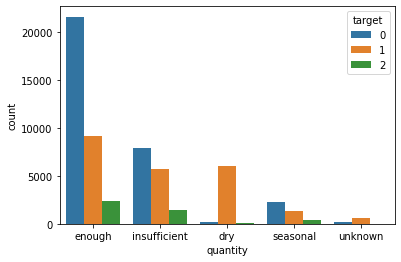

In [50]:
ax = sns.countplot(x='quantity', hue="target", data=data_df)

#### Unique Values

In [51]:
def unique_values(df):
    info_df = df.info()
    print(dashes)
    print('\n')
    num_unique = df.nunique()
    print("Number of uniques values in each Feature/Column:")
    
    return num_unique

unique_values(data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   longitude              59400 non-null  float64
 2   latitude               59400 non-null  float64
 3   num_private            59400 non-null  int64  
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   district_code          59400 non-null  int64  
 7   population             59400 non-null  int64  
 8   public_meeting         56066 non-null  object 
 9   recorded_by            59400 non-null  object 
 10  permit                 56344 non-null  object 
 11  construction_year      59400 non-null  int64  
 12  extraction_type_group  59400 non-null  object 
 13  management             59400 non-null  object 
 14  management_group       59400 non-null  object 
 15  pa

amount_tsh                  98
longitude                57516
latitude                 57517
num_private                 65
basin                        9
region                      21
district_code               20
population                1049
public_meeting               2
recorded_by                  1
permit                       2
construction_year           55
extraction_type_group       13
management                  12
management_group             5
payment                      7
payment_type                 7
quality_group                6
quantity                     5
source                      10
waterpoint_type              7
target                       3
dtype: int64

#### Null Values

In [52]:
def nan_more_fifty(df): 
    for column in df:
        if df[column].isnull().sum()*100.0/df.shape[0] > 50:
            df.drop(column,1, inplace=True)
        #else:
    print('There are no columns with 50% null values')
    return df        

In [53]:
#revised = nan_more_fifty(data_df)

Index(['public_meeting', 'permit'], dtype='object')


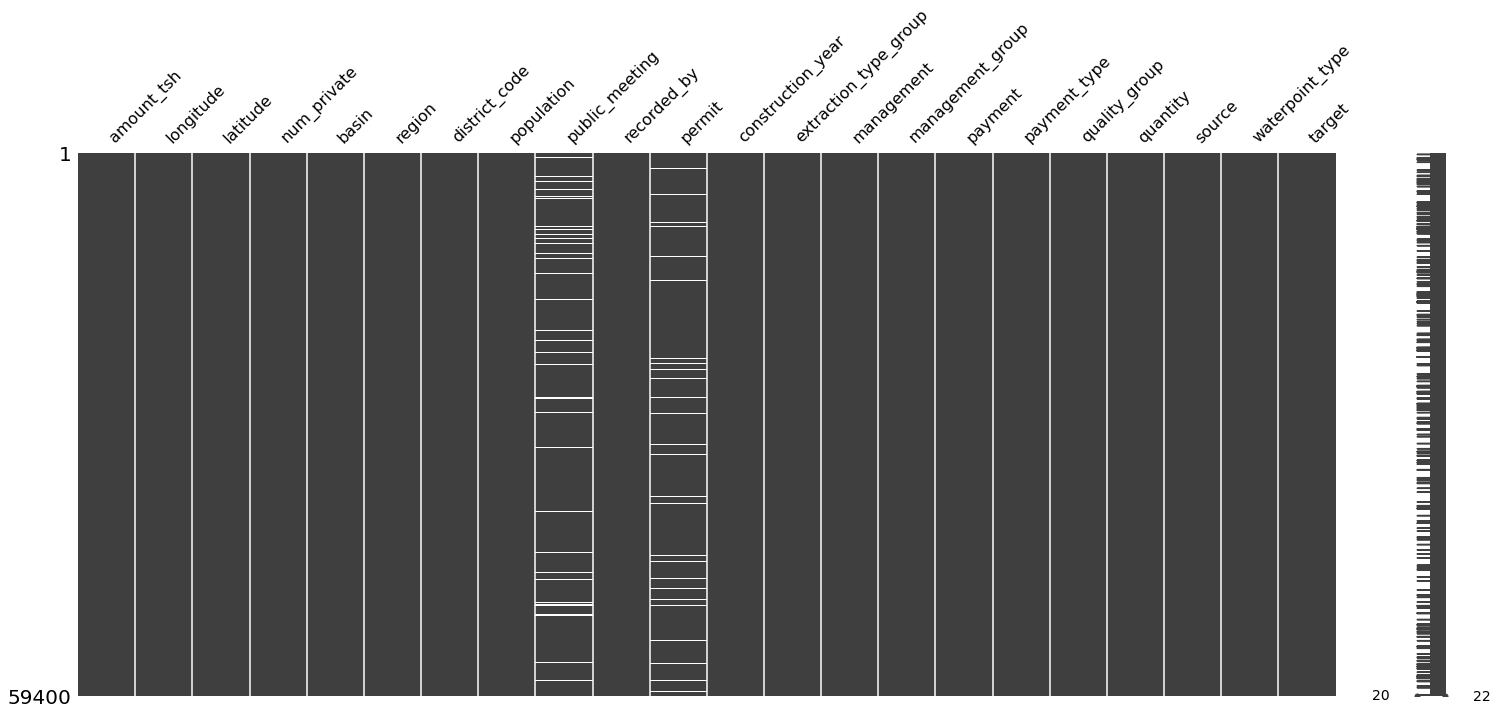

In [54]:
def count_null(df):
    #only features w/null values
    null_columns=df.columns[df.isnull().any()]
    test = df[null_columns].isnull().sum()
    if test.empty:
        print('No nulls')
    else:
        print(null_columns)
    
    # Visualize missing values as a matrix 
    msno.matrix(df) 
    
    return test
    
nan_values = count_null(data_df)  

In [55]:
#df['scheme_management'].value_counts(dropna=False)

#### Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
y = data_df['target']
X = data_df.drop('target',axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [59]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44550, 21)
(44550,)
(14850, 21)
(14850,)


#### Address Null Values

In [60]:
from sklearn.impute import SimpleImputer

In [61]:
nan_values.index

Index(['public_meeting', 'permit'], dtype='object')

In [62]:
nan_col = ['public_meeting', 'permit']
X_train_nan = X_train[nan_col]
X_test_nan = X_test[nan_col]

In [63]:
from sklearn.impute import SimpleImputer

def remake(X_train_cln,X_train):
       return pd.DataFrame(X_train_cln,columns=X_train.columns, index=X_train.index)

def impute(X_train, X_test):
    imputer = SimpleImputer(strategy='most_frequent')
    X_train_cln = remake(imputer.fit_transform(X_train), X_train) #remake function
    X_test_cln = remake(imputer.transform(X_test ), X_test)
    X_test_cln
    #X_train_cln = X_train_cln.astype(float)
    #X_test_cln = X_test_cln.astype(float)
    
    return X_train_cln, X_test_cln

In [64]:
X_train_cln, X_test_cln = impute(X_train_nan,X_test_nan)

In [65]:
# X_train_cln.head()

In [66]:
X_train.isna().sum()

amount_tsh                  0
longitude                   0
latitude                    0
num_private                 0
basin                       0
region                      0
district_code               0
population                  0
public_meeting           2525
recorded_by                 0
permit                   2285
construction_year           0
extraction_type_group       0
management                  0
management_group            0
payment                     0
payment_type                0
quality_group               0
quantity                    0
source                      0
waterpoint_type             0
dtype: int64

In [67]:
X_train.shape, X_test.shape

((44550, 21), (14850, 21))

In [68]:
X_train_no_nan = X_train.drop(nan_col, axis=1)
X_test_no_nan = X_test.drop(nan_col, axis=1)

In [69]:
"""
(44550, 29)
(44550,)
(14850, 29)
(14850,)

"""

# print(X_train_no_nan.shape)
# print(y_train.shape)
# print(X_test_no_nan.shape)
# print(y_test.shape)

'\n(44550, 29)\n(44550,)\n(14850, 29)\n(14850,)\n\n'

In [70]:
X_train_1 = pd.concat([X_train_no_nan,X_train_cln],axis=1)
X_test_1 = pd.concat([X_test_no_nan,X_test_cln],axis=1)

In [71]:
# print(X_train_1.shape)
# print(X_test_1.shape)

In [72]:
#X_train_1.head()

In [73]:
#X_test_1.isna().sum()

No nulls
Series([], dtype: float64)
------------------------------------------------------------
No nulls
Series([], dtype: float64)


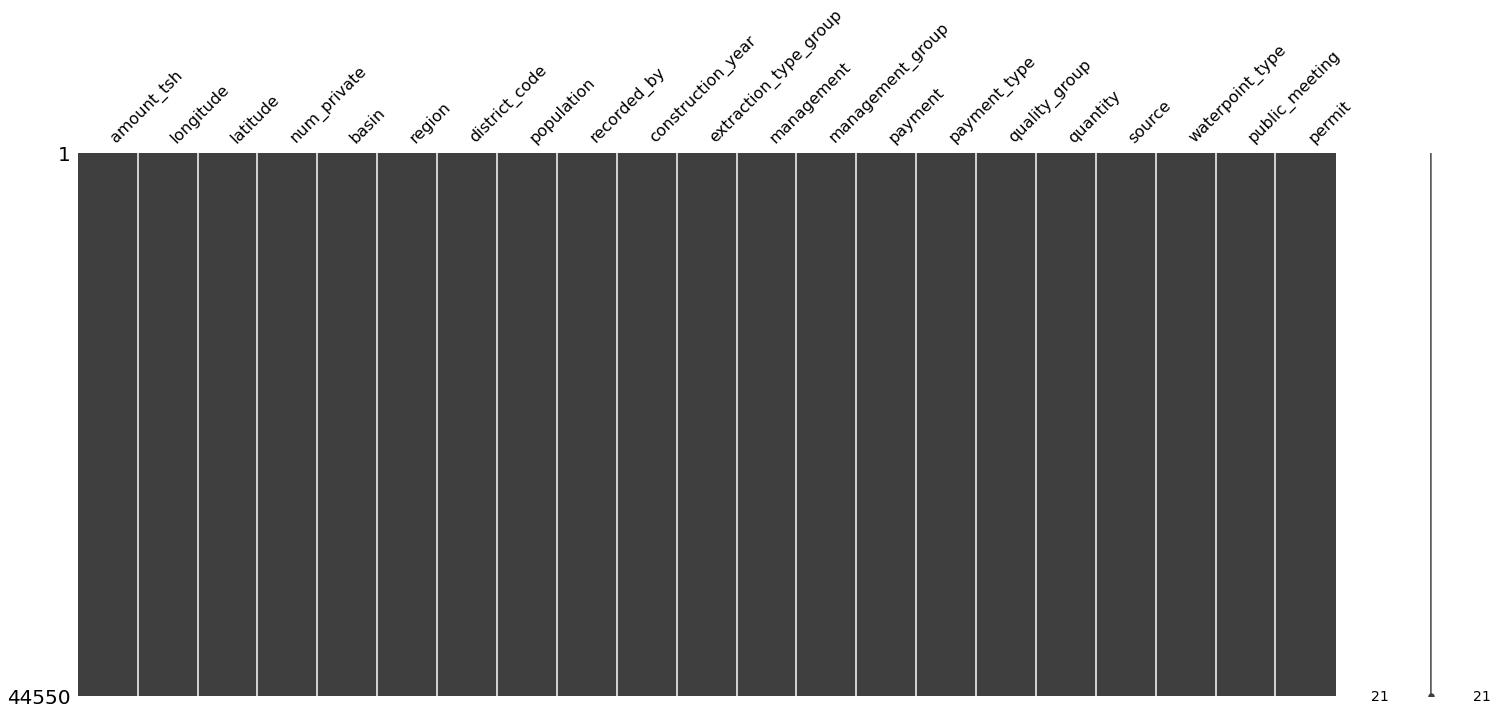

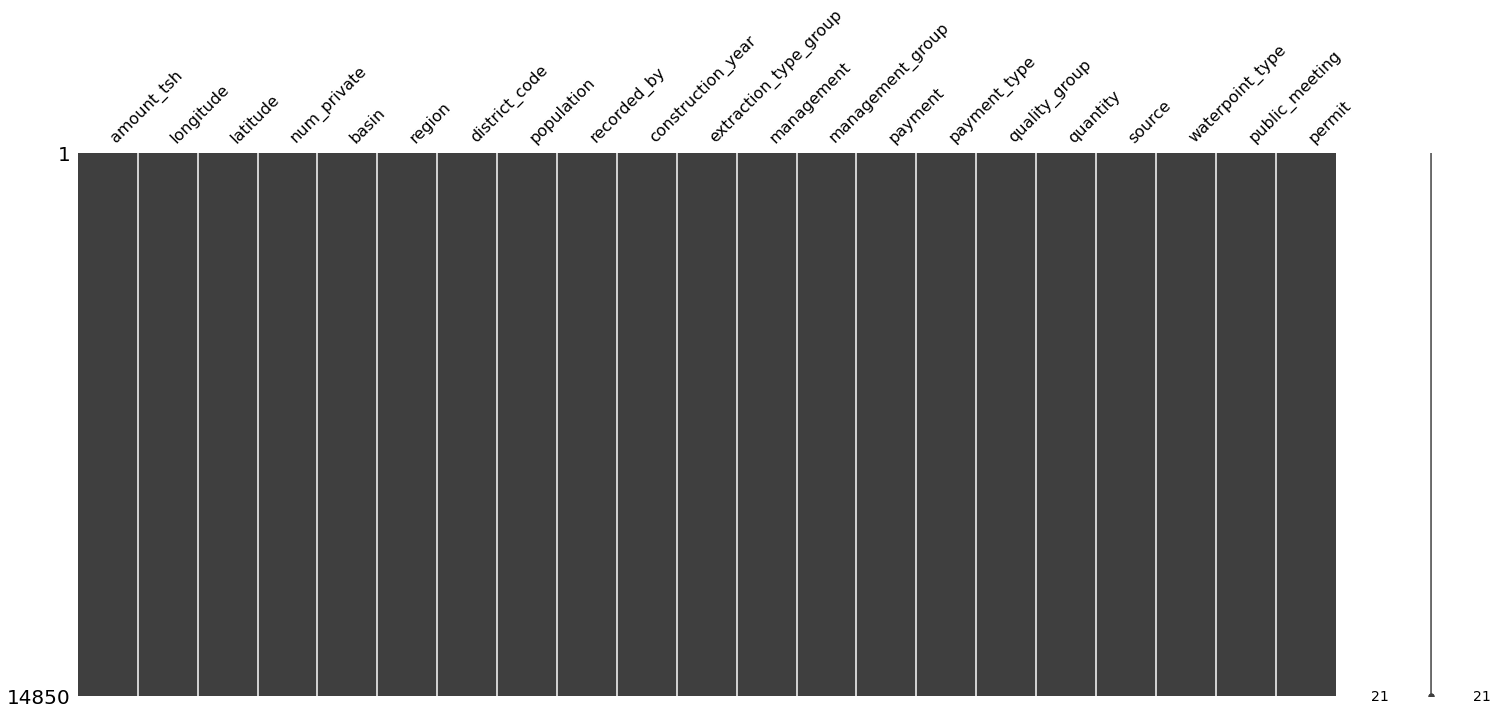

In [74]:
print(count_null(X_train_1))
print(dashes)
print(count_null(X_test_1))

#### One-Hot Encode Categoricals

In [75]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 24947 to 56422
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   longitude              44550 non-null  float64
 2   latitude               44550 non-null  float64
 3   num_private            44550 non-null  int64  
 4   basin                  44550 non-null  object 
 5   region                 44550 non-null  object 
 6   district_code          44550 non-null  int64  
 7   population             44550 non-null  int64  
 8   recorded_by            44550 non-null  object 
 9   construction_year      44550 non-null  int64  
 10  extraction_type_group  44550 non-null  object 
 11  management             44550 non-null  object 
 12  management_group       44550 non-null  object 
 13  payment                44550 non-null  object 
 14  payment_type           44550 non-null  object 
 15

In [76]:
cat_cols = X_train_1.select_dtypes('O')
cat_cols.head()

,basin,region,recorded_by,extraction_type_group,management,management_group,payment,payment_type,quality_group,quantity,source,waterpoint_type,public_meeting,permit
24947,Wami / Ruvu,Pwani,GeoData Consultants Ltd,submersible,vwc,user-group,pay per bucket,per bucket,salty,insufficient,machine dbh,communal standpipe,True,True
22630,Lake Victoria,Mwanza,GeoData Consultants Ltd,nira/tanira,wug,user-group,unknown,unknown,good,enough,shallow well,hand pump,True,False
13789,Lake Victoria,Mwanza,GeoData Consultants Ltd,india mark ii,vwc,user-group,never pay,never pay,good,enough,machine dbh,hand pump,True,True
15697,Internal,Singida,GeoData Consultants Ltd,gravity,wua,user-group,never pay,never pay,good,seasonal,rainwater harvesting,communal standpipe,True,True
22613,Lake Nyasa,Ruvuma,GeoData Consultants Ltd,gravity,vwc,user-group,unknown,unknown,good,dry,spring,communal standpipe,True,True


In [77]:
#len(cat_cols.columns)

In [78]:
num_cols = X_train_1.select_dtypes('number')
len(num_cols.columns)

7

In [79]:
cat_cols.columns

Index(['basin', 'region', 'recorded_by', 'extraction_type_group', 'management',
       'management_group', 'payment', 'payment_type', 'quality_group',
       'quantity', 'source', 'waterpoint_type', 'public_meeting', 'permit'],
      dtype='object')

In [80]:
#'region','region_code','district_code'

cols_hot = ['basin', 'region', 'recorded_by', 'extraction_type_group',
       'management', 'management_group', 'payment',
       'payment_type', 'quality_group', 'quantity',
       'source', 'waterpoint_type', 'public_meeting', 'permit']

def one_hot(df_train, df_test, columns=cols_hot):
    one_hot_train = pd.get_dummies(df_train, columns=cols_hot, drop_first=True)
    one_hot_test = pd.get_dummies(df_test, columns=cols_hot, drop_first=True)
    
    return one_hot_train, one_hot_test

In [81]:
one_hot_train, one_hot_test = one_hot(X_train, X_test, cols_hot)

In [82]:
one_hot_train.shape, one_hot_test.shape

((44550, 100), (14850, 100))

In [83]:
#one_hot_train['region_code'].value_counts()

In [84]:
#one_hot_test.head()

In [85]:
# pd.set_option('display.max_rows', None)
# one_hot_train.info()

#### Scale Data

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
def scale_data(sscaler, X_train_int, X_test_int,y_train):
    #scaler = sscaler
    #transform the training and test sets
    scaled_data_train = sscaler.fit_transform(X_train_int, y_train)
    scaled_data_test = sscaler.transform(X_test_int)
    #convert into a dataframe
    scaled_df_tra = pd.DataFrame(scaled_data_train, columns=X_train_int.columns)
    scaled_df_tes = pd.DataFrame(scaled_data_test, columns=X_test_int.columns)
    
    return scaled_df_tra, scaled_df_tes

In [88]:
train_scale, test_scale = scale_data(StandardScaler(),  one_hot_train, one_hot_test,y_train)

In [89]:
train_scale.shape, test_scale.shape

((44550, 100), (14850, 100))

In [90]:
train_scale.head()

,amount_tsh,longitude,latitude,num_private,district_code,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,public_meeting_True,permit_True
0,-0.093074,0.616411,-0.129019,-0.037802,-0.479998,-0.209732,0.702954,-0.302772,-0.209144,-0.349442,-0.455788,-0.420435,-0.393527,-0.287445,2.976669,-0.118313,-0.196301,-0.313688,-0.243158,-0.222307,-0.280103,-0.165019,-0.166236,-0.185695,-0.288222,-0.269328,-0.173372,-0.234014,4.63436,-0.178458,-0.214580,-0.302551,-0.191188,-0.185889,-0.212454,-0.901196,-0.205730,-0.03793,-0.225183,-0.401025,-0.348471,-0.078955,-0.045737,-0.089242,2.921563,-0.256991,-0.042679,-0.120441,-0.042148,-0.174194,-0.185307,-0.036724,-0.099185,0.681752,-0.123941,-0.22661,-0.211876,-0.351058,-0.127806,-0.174194,-0.099185,0.361857,-0.134188,-0.254501,-0.399969,2.360664,-0.266779,-0.398608,-0.399969,-0.864801,-0.266779,-0.134188,2.360664,-0.398608,-0.062256,-2.422528,-0.1188,3.218090,-0.179992,-1.124921,1.711914,-0.269376,-0.11595,-0.122628,-0.113743,2.085065,-0.062437,-0.199242,-0.439821,-0.630801,-0.630975,-0.034185,1.042285,-0.336484,-0.008206,-0.648606,-0.116644,-0.346889,0.408462,0.729442
1,-0.099150,-5.221778,1.940133,-0.037802,-0.479998,-0.379567,-1.371444,-0.302772,-0.209144,-0.349442,2.194003,-0.420435,-0.393527,-0.287445,-0.335946,-0.118313,-0.196301,-0.313688,-0.243158,-0.222307,-0.280103,-0.165019,-0.166236,-0.185695,-0.288222,-0.269328,-0.173372,4.273254,-0.21578,-0.178458,-0.214580,-0.302551,-0.191188,-0.185889,-0.212454,-0.901196,-0.205730,-0.03793,-0.225183,2.493608,-0.348471,-0.078955,-0.045737,-0.089242,-0.342283,-0.256991,-0.042679,-0.120441,-0.042148,-0.174194,-0.185307,-0.036724,-0.099185,-1.466809,-0.123941,-0.22661,-0.211876,2.848536,-0.127806,-0.174194,-0.099185,0.361857,-0.134188,-0.254501,-0.399969,-0.423610,-0.266779,2.508727,-0.399969,-0.864801,-0.266779,-0.134188,-0.423610,2.508727,-0.062256,0.412792,-0.1188,-0.310743,-0.179992,0.888952,-0.584141,-0.269376,-0.11595,-0.122628,-0.113743,-0.479601,-0.062437,-0.199242,-0.439821,1.585285,-0.630975,-0.034185,-0.959431,-0.336484,-0.008206,1.541767,-0.116644,-0.346889,-2.4482

### Baseline Model

In [91]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

dummy_clf.score(train_scale, y_train)

0.542334455667789

#### Imbalance

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
def smote_resample(y, X_train, y_train):
    # Previous original class distribution
    print('Original class distribution: \n')
    print(y.value_counts())
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
    # Preview synthetic sample class distribution
    print('-----------------------------------------')
    print('Synthetic sample class distribution: \n')
    print(pd.Series(y_train_resampled).value_counts()) 
    
    return X_train_resampled, y_train_resampled

In [94]:
train_resampled, y_train_resampled = smote_resample(y, train_scale, y_train)

Original class distribution: 

0    32259
1    22824
2     4317
Name: target, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

2    24161
1    24161
0    24161
Name: target, dtype: int64


In [95]:
#df_1['lga'].value_counts(dropna=False)
train_resampled.head()

,amount_tsh,longitude,latitude,num_private,district_code,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,public_meeting_True,permit_True
0,-0.093074,0.616411,-0.129019,-0.037802,-0.479998,-0.209732,0.702954,-0.302772,-0.209144,-0.349442,-0.455788,-0.420435,-0.393527,-0.287445,2.976669,-0.118313,-0.196301,-0.313688,-0.243158,-0.222307,-0.280103,-0.165019,-0.166236,-0.185695,-0.288222,-0.269328,-0.173372,-0.234014,4.63436,-0.178458,-0.214580,-0.302551,-0.191188,-0.185889,-0.212454,-0.901196,-0.205730,-0.03793,-0.225183,-0.401025,-0.348471,-0.078955,-0.045737,-0.089242,2.921563,-0.256991,-0.042679,-0.120441,-0.042148,-0.174194,-0.185307,-0.036724,-0.099185,0.681752,-0.123941,-0.22661,-0.211876,-0.351058,-0.127806,-0.174194,-0.099185,0.361857,-0.134188,-0.254501,-0.399969,2.360664,-0.266779,-0.398608,-0.399969,-0.864801,-0.266779,-0.134188,2.360664,-0.398608,-0.062256,-2.422528,-0.1188,3.218090,-0.179992,-1.124921,1.711914,-0.269376,-0.11595,-0.122628,-0.113743,2.085065,-0.062437,-0.199242,-0.439821,-0.630801,-0.630975,-0.034185,1.042285,-0.336484,-0.008206,-0.648606,-0.116644,-0.346889,0.408462,0.729442
1,-0.099150,-5.221778,1.940133,-0.037802,-0.479998,-0.379567,-1.371444,-0.302772,-0.209144,-0.349442,2.194003,-0.420435,-0.393527,-0.287445,-0.335946,-0.118313,-0.196301,-0.313688,-0.243158,-0.222307,-0.280103,-0.165019,-0.166236,-0.185695,-0.288222,-0.269328,-0.173372,4.273254,-0.21578,-0.178458,-0.214580,-0.302551,-0.191188,-0.185889,-0.212454,-0.901196,-0.205730,-0.03793,-0.225183,2.493608,-0.348471,-0.078955,-0.045737,-0.089242,-0.342283,-0.256991,-0.042679,-0.120441,-0.042148,-0.174194,-0.185307,-0.036724,-0.099185,-1.466809,-0.123941,-0.22661,-0.211876,2.848536,-0.127806,-0.174194,-0.099185,0.361857,-0.134188,-0.254501,-0.399969,-0.423610,-0.266779,2.508727,-0.399969,-0.864801,-0.266779,-0.134188,-0.423610,2.508727,-0.062256,0.412792,-0.1188,-0.310743,-0.179992,0.888952,-0.584141,-0.269376,-0.11595,-0.122628,-0.113743,-0.479601,-0.062437,-0.199242,-0.439821,1.585285,-0.630975,-0.034185,-0.959431,-0.336484,-0.008206,1.541767,-0.116644,-0.346889,-2.4482

In [96]:
y_train_resampled.head()

0    1
1    0
2    0
3    0
4    1
Name: target, dtype: int64

In [97]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score
#from sklearn.preprocessing import label_binarize
from yellowbrick.classifier import ROCAUC

from sklearn.model_selection import cross_val_score

In [98]:
y_train.dtype

dtype('int64')

### Create Model
recall-How good is our model at finding wells that don't work. Of postive class, what percentage did we find.

In [99]:
y_test.value_counts()

0    8098
1    5678
2    1074
Name: target, dtype: int64

In [100]:
y_train_resampled.value_counts()

2    24161
1    24161
0    24161
Name: target, dtype: int64

In [101]:
y_test.value_counts(normalize=True)

0    0.545320
1    0.382357
2    0.072323
Name: target, dtype: float64

In [102]:
# def eval_classification_model(class_model, X_train,X_test, y_train, y_test,
#                               normalize='true',cmap='Blues',figsize=[10,5]):
#     #Classification Model
#     class_model.fit(X_train, y_train)
#     # get Predictions
#     y_hat_train = class_model.predict(X_train)
#     y_hat_test =  class_model.predict(X_test)
#     #evaluate model
#     print("Training Accuracy on  Model: {}".format(accuracy_score(y_train, y_hat_train)))
#     print("Testing Accuracy on  Model: {}".format(accuracy_score(y_test, y_hat_test)))
#     # recall_score(y, lr.predict(X), average=None)
#     print('Recall: {}'.format(recall_score(y_test, y_hat_test, average=None))) #average='micro'
#     print('Recall: {}'.format(recall_score(y_test, y_hat_test, average=None)[1]))
#     scores = cross_val_score(class_model,X_test, y_test,cv=5)
#     print('Cross-validation scores on testing set: {}'.format(scores))
#     print('Average cross-validation score on testing set: {:.2f}'.format(scores.mean()))
    
#     #print("Precision Score on  Model: {}".format(precision_score(y_test, y_hat_test, average=None)))
#     #print('Precision: {}'.format(recall_score(y_test, y_hat_test,average='None')))
    
#     print('\n')
    
#     # Classification Report / Accuracy Score 
#     print(dashes)
#     print("Classification Report")
#     print(dashes)
#     classes = ['0/Functional','1/Non-functioning','2/Needs Repair']
#     print(metrics.classification_report(y_test,y_hat_test,target_names=classes))  
#     print(dashes)
#     print('\n')

#     fig, axes = plt.subplots(ncols=2,figsize= figsize)   #ncols=2,
#     #Confusion Matrix
#     metrics.plot_confusion_matrix(class_model,X_test,y_test,normalize=normalize,
#                                   cmap=cmap, ax=axes[0])  #axes[0]
    
#     metrics.plot_confusion_matrix(class_model,X_test,y_test,normalize=None,
#                                   cmap=cmap, ax=axes[1])  #axes[0]

#     return class_model

def eval_classification_model(class_model, X_train,X_test, y_train, y_test,
                              normalize='true',cmap='Blues',figsize=[10,5]):
    #Classification Model
    class_model.fit(X_train, y_train)
    # get Predictions
    y_hat_train = class_model.predict(X_train)
    y_hat_test =  class_model.predict(X_test)
    #evaluate model
    print("Training Accuracy on  Model: {}".format(accuracy_score(y_train, y_hat_train)))
    print("Testing Accuracy on  Model: {}".format(accuracy_score(y_test, y_hat_test)))
    # recall_score(y, lr.predict(X), average=None)
    print('Recall: {}'.format(recall_score(y_test, y_hat_test, average=None))) #average='micro'
    print('Recall: {}'.format(recall_score(y_test, y_hat_test, average=None)[1]))
    scores = cross_val_score(class_model,X_test, y_test,cv=5)
    print('Cross-validation scores on testing set: {}'.format(scores))
    print('Average cross-validation score on testing set: {:.2f}'.format(scores.mean()))
    
    #print("Precision Score on  Model: {}".format(precision_score(y_test, y_hat_test, average=None)))
    #print('Precision: {}'.format(recall_score(y_test, y_hat_test,average='None')))
    
    print('\n')
    
    # Classification Report / Accuracy Score 
    print(dashes)
    print("Classification Report")
    print(dashes)
    classes = ['0/Functional','1/Non-functioning','2/Needs Repair']
    print(metrics.classification_report(y_test,y_hat_test,target_names=classes))  
    print(dashes)
    print('\n')

    fig, axes = plt.subplots(ncols=2,figsize= figsize)   #ncols=2,
    #Confusion Matrix
    metrics.plot_confusion_matrix(class_model,X_test,y_test,normalize=normalize,
                                  cmap=cmap, ax=axes[0])  #axes[0]
    
#     metrics.plot_confusion_matrix(class_model,X_test,y_test,normalize=None,
#                                   cmap=cmap, ax=axes[1])  #axes[0]
    visualizer = ROCAUC(class_model, classes=["functioning", "non-functioning",'functioning needs repair'],ax=axes[1])

    """
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    """
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer.show()                    

    return class_model


#### Logistic Regression

Training Accuracy on  Model: 0.6420264061917967
Testing Accuracy on  Model: 0.6241077441077441
Recall: [0.62200543 0.62169778 0.65270019]
Recall: 0.6216977809087707
Cross-validation scores on testing set: [0.73131313 0.72895623 0.71952862 0.72255892 0.71851852]
Average cross-validation score on testing set: 0.72


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.78      0.62      0.69      8098
1/Non-functioning       0.77      0.62      0.69      5678
   2/Needs Repair       0.18      0.65      0.29      1074

         accuracy                           0.62     14850
        macro avg       0.58      0.63      0.56     14850
     weighted avg       0.73      0.62      0.66     14850

------------------------------------------------------------




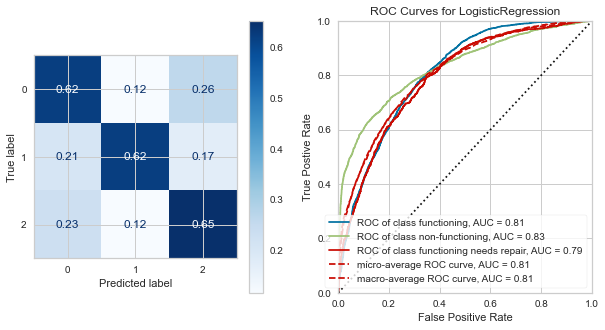

In [103]:
model = eval_classification_model(LogisticRegression(), train_resampled, test_scale, 
                 y_train_resampled,y_test)

Training Accuracy on  Model: 0.6320240608142599
Testing Accuracy on  Model: 0.5804040404040404
Recall: [0.58755248 0.54262064 0.72625698]
Recall: 0.5426206410707995
Cross-validation scores on testing set: [0.67643098 0.69259259 0.67777778 0.68350168 0.67407407]
Average cross-validation score on testing set: 0.68


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.77      0.59      0.67      8098
1/Non-functioning       0.84      0.54      0.66      5678
   2/Needs Repair       0.16      0.73      0.26      1074

         accuracy                           0.58     14850
        macro avg       0.59      0.62      0.53     14850
     weighted avg       0.75      0.58      0.63     14850

------------------------------------------------------------




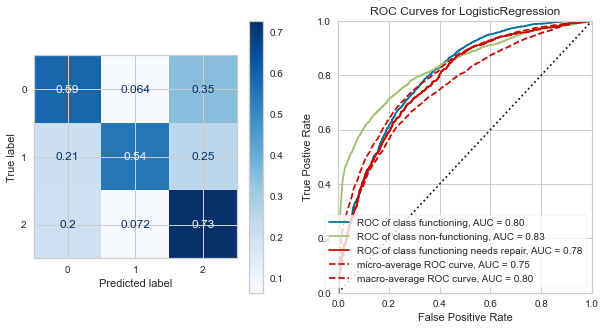

In [104]:
# train_resampled, y_train_resampled
# functional':0,'non functional':1,'functional needs repair':2})
#, classes={0:'functional',1:'non functional',2:'functional needs repair'}

model = eval_classification_model(LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear'), train_resampled, test_scale, 
                 y_train_resampled,y_test)

In [105]:
# Binarize the output
# y_bin = label_binarize(y, classes=[0, 1, 2])
# n_classes = y_bin.shape[1]
# # We split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size= 0.5, random_state=0)

In [106]:
# #classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=0))
# classifier = LogisticRegression()
# y_score = classifier.fit(one_hot_train, y_train).decision_function(one_hot_test)
# # Plotting and estimation of FPR, TPR
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# colors = cycle(['blue', 'red', 'green'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))
# plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
# plt.xlim([-0.05, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
# plt.legend(loc="lower right")

#### GridsearchCV

In [107]:
from sklearn.model_selection import GridSearchCV
#f1 score-averaging
model = LogisticRegression()
params = {'C':[1e12, 0.001, 0.01, 0.1, 1,10, 100], 'fit_intercept':[True,False]}
gridsearch = GridSearchCV(model,params, scoring='recall_macro')

In [108]:
# train_resampled, y_train_resampled
gridsearch.fit(train_resampled, y_train_resampled)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1000000000000.0, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False]},
             scoring='recall_macro')

In [109]:
#of all params it tried thi gave it hte highest score
best_params = gridsearch.best_params_
best_params

{'C': 0.1, 'fit_intercept': False}

In [110]:
#this is hte actual model it trained
best_model = gridsearch.best_estimator_
best_model

LogisticRegression(C=0.1, fit_intercept=False)

Training Accuracy on  Model: 0.6430749279141316
Testing Accuracy on  Model: 0.6139393939393939
Recall: [0.61299086 0.60109193 0.68901304]
Recall: 0.6010919337794999
Cross-validation scores on testing set: [0.72525253 0.72491582 0.71750842 0.72525253 0.71010101]
Average cross-validation score on testing set: 0.72


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.78      0.61      0.69      8098
1/Non-functioning       0.79      0.60      0.68      5678
   2/Needs Repair       0.18      0.69      0.28      1074

         accuracy                           0.61     14850
        macro avg       0.58      0.63      0.55     14850
     weighted avg       0.74      0.61      0.66     14850

------------------------------------------------------------




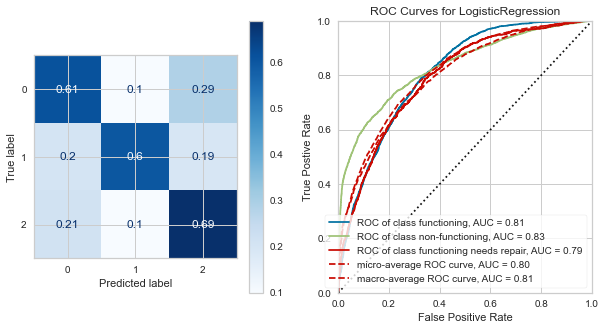

In [111]:
# train_resampled, y_train_resampled

# best_model = LogisticRegression(**best_params)
# best_model.fit(train_scale,y_train)
model = eval_classification_model(best_model,train_resampled, test_scale,y_train_resampled, y_test) #,classes=['Died','Survived']

#### K Nearest Neighbors Classifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier

Training Accuracy on  Model: 0.8646441234496365
Testing Accuracy on  Model: 0.7227609427609427
Recall: [0.73907138 0.73476576 0.53631285]
Recall: 0.7347657625924622
Cross-validation scores on testing set: [0.71515152 0.72020202 0.72020202 0.71245791 0.71077441]
Average cross-validation score on testing set: 0.72


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.81      0.74      0.77      8098
1/Non-functioning       0.76      0.73      0.75      5678
   2/Needs Repair       0.30      0.54      0.38      1074

         accuracy                           0.72     14850
        macro avg       0.62      0.67      0.63     14850
     weighted avg       0.75      0.72      0.73     14850

------------------------------------------------------------




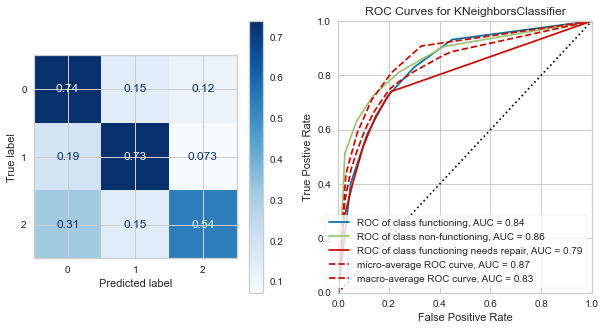

In [113]:
#train_resampled, test_scale,y_train_resampled, y_test
model = eval_classification_model(KNeighborsClassifier(), 
                                                    train_resampled, test_scale, y_train_resampled,y_test)

In [114]:
# model = KNeighborsClassifier()
# params = {'n_neighbors':range(1, 6, 2)} #1,26,2

# gridsearch = GridSearchCV(model,params, scoring='f1_macro')
# gridsearch.fit(train_resampled, y_train_resampled)

#### Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier

Training Accuracy on  Model: 0.6329898045058842
Testing Accuracy on  Model: 0.6041077441077441
Recall: [0.64139294 0.56005636 0.55586592]
Recall: 0.5600563578724903
Cross-validation scores on testing set: [0.67777778 0.69326599 0.68754209 0.69292929 0.66969697]
Average cross-validation score on testing set: 0.68


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.74      0.64      0.69      8098
1/Non-functioning       0.73      0.56      0.63      5678
   2/Needs Repair       0.17      0.56      0.26      1074

         accuracy                           0.60     14850
        macro avg       0.55      0.59      0.53     14850
     weighted avg       0.70      0.60      0.64     14850

------------------------------------------------------------




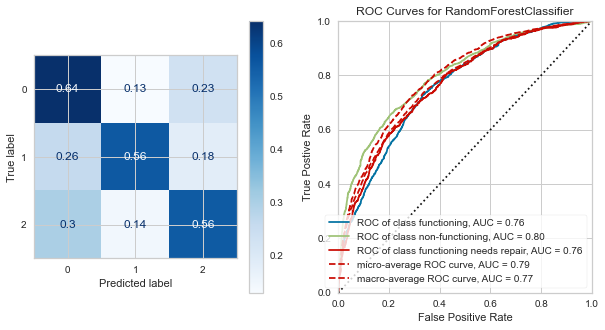

In [116]:
rforest = eval_classification_model(RandomForestClassifier(max_depth=5), 
                                            train_resampled, test_scale, y_train_resampled,y_test)

In [117]:
rforest

RandomForestClassifier(max_depth=5)

In [118]:
df_import = pd.Series(rforest.feature_importances_,index=train_resampled.columns, name='Importance')
df_import.sort_values()

extraction_type_group_india mark iii     0.000000
waterpoint_type_dam                      0.000000
quality_group_fluoride                   0.000000
extraction_type_group_other motorpump    0.000000
extraction_type_group_wind-powered       0.000000
                                           ...   
extraction_type_group_gravity            0.058113
quantity_enough                          0.058240
waterpoint_type_other                    0.093532
longitude                                0.098197
extraction_type_group_other              0.114848
Name: Importance, Length: 100, dtype: float64

In [119]:
def plot_importance(forest, top_n=10, figsize=(10,10)):
    df_importance = pd.Series(forest.feature_importances_,index=train_resampled.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(kind='barh', figsize=figsize)
    
    return df_importance

amount_tsh                         0.037998
longitude                          0.098197
latitude                           0.042782
num_private                        0.000016
district_code                      0.023796
                                     ...   
waterpoint_type_hand pump          0.015113
waterpoint_type_improved spring    0.002141
waterpoint_type_other              0.093532
public_meeting_True                0.001368
permit_True                        0.005881
Length: 100, dtype: float64

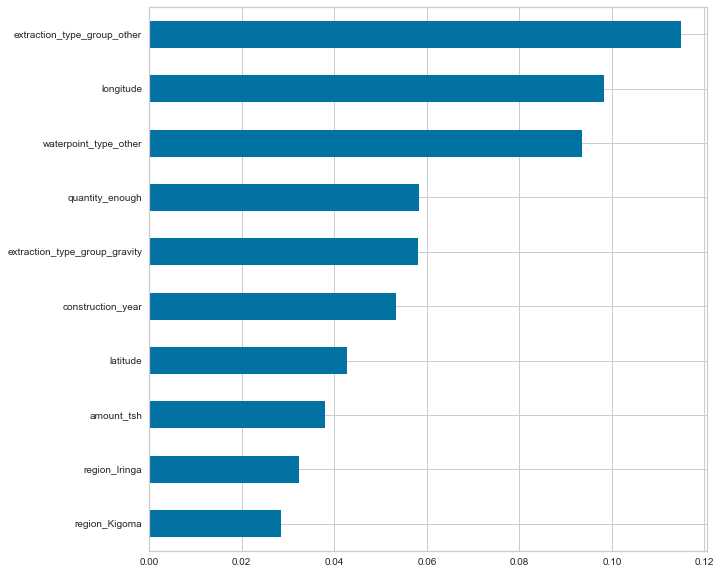

In [120]:
plot_importance(rforest)

In [121]:
def ensemble_features(forest, top_n=10, figsize=(10,10)):
    df_importance = pd.Series(forest.feature_importances_,index=train_resampled.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(kind='barh', figsize=figsize)
    
    return df_importance
    

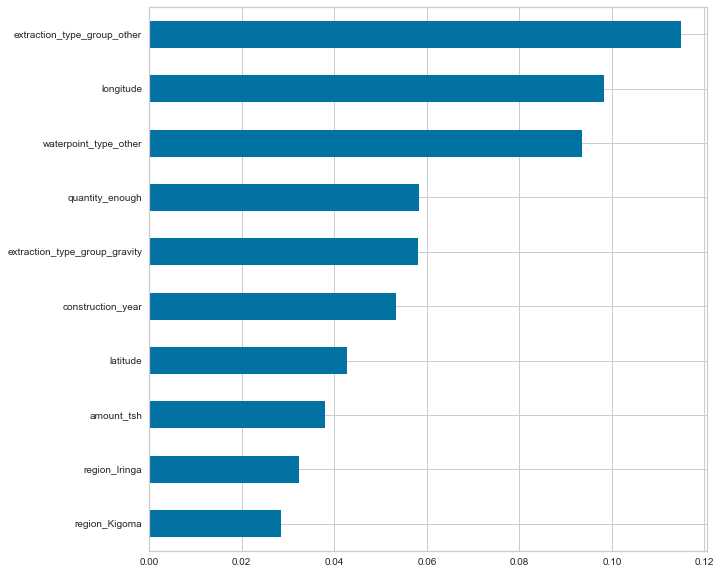

In [122]:
#top 10 imporant features as determined by our model
#what were most important things in determing the output
forest_1 = ensemble_features(rforest)

In [123]:
import tzlocal
import datetime as dt#to get current time
tz = tzlocal.get_localzone()
print(tz)
start = dt.datetime.now(tz)
print(start.strftime("%m/%d/%y - %I:%m %p"))

America/New_York
09/26/20 - 06:09 PM


In [124]:
"""
how long model takes ot produce results
tells us when it ended and how long ago
"""
class Timer() :

    def __init__(self, format_="%m/%d/%y - %I:%m %p"): #when we intialize class its going to perform these actions
        import tzlocal
        import datetime as dt#to get current time
        self.tz = tzlocal.get_localzone() #save and can call out whenever we want
        self.fmt = format_
        
        self.created_at =self.get_time()
        
    def get_time(self): 
        import datetime as dt
        return dt.datetime.now(self.tz)
    
    def start(self): #need to get the time
        time = self.get_time()
        self.start= time
        print(f"[i]Timer started at {self.start.strftime(self.fmt)}")
        
    def stop(self):
        time = self.get_time()
        self.end = time
        print(f"[i]Timer ended at {self.end.strftime(self.fmt)}")
        print(f"- Total Time= {self.end - self.start}")
        

In [125]:
"""
model = LogisticRegression()
params = {'C':[0.001, 0.01, 0.1, 1,10, 100]}
gridsearch = GridSearchCV(model,params, scoring='f1_macro')

gridsearch.fit(train_resampled, y_train_resampled)
----------------
timer = Timer()
#     #print(timer.created_at)
    timer.start()
    
    grid_clf.fit(X_train, y_train)
    #timer.stop()
    timer.stop()
    
    #grid_clf.best_params_
    
    return grid_clf.best_params_
"""
param_grid = {"criterion":["gini",'entropy'],
                 'max_depth':[None,3],#[None,5,3,8,10]
                 'max_features':['auto','sqrt',3,5]}#list of options

forest_2 = RandomForestClassifier()
grid_clf = GridSearchCV(forest_2, param_grid)

timer = Timer()
timer.start()

grid_clf.fit(train_resampled, y_train_resampled)

timer.stop()

[i]Timer started at 09/26/20 - 06:09 PM
[i]Timer ended at 09/26/20 - 06:09 PM
- Total Time= 0:11:49.982016


In [126]:
# timer = Timer()
# timer.start()

## gridsearch.fit(train_resampled, y_train_resampled)
#grid_clf.fit(train_resampled, y_train_resampled)

#timer.stop()

grid_clf.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}

Training Accuracy on  Model: 0.9280245022970903
Testing Accuracy on  Model: 0.7776430976430977
Recall: [0.80896518 0.7773864  0.54283054]
Recall: 0.7773864036632617
Cross-validation scores on testing set: [0.78417508 0.78215488 0.77744108 0.78282828 0.76565657]
Average cross-validation score on testing set: 0.78


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.83      0.81      0.82      8098
1/Non-functioning       0.82      0.78      0.80      5678
   2/Needs Repair       0.37      0.54      0.44      1074

         accuracy                           0.78     14850
        macro avg       0.67      0.71      0.69     14850
     weighted avg       0.79      0.78      0.78     14850

------------------------------------------------------------




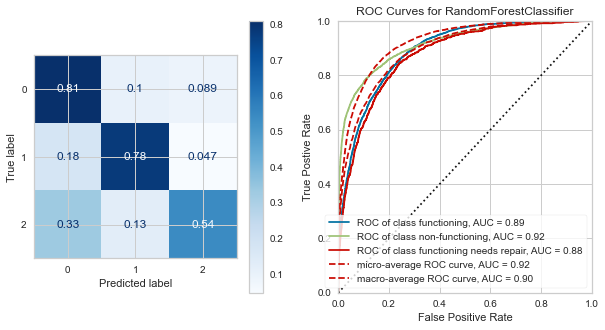

In [127]:
"""
(n_estimators=200,min_samples_leaf=3 ,n_jobs=-1,max_features=0.25

"""
rforest = eval_classification_model(RandomForestClassifier(n_estimators=200,min_samples_leaf=3 ,n_jobs=-1,max_features=0.25), 
                                            train_resampled, test_scale, y_train_resampled,y_test)

In [128]:
"""
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

# Load the classification dataset
X, y = load_spam()

# Create the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["not_spam", "is_spam"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

"""
from yellowbrick.classifier import ROCAUC

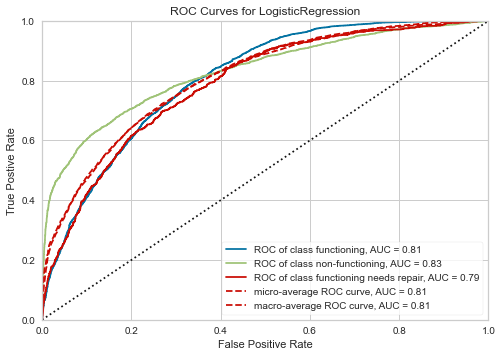

In [129]:
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["functioning", "non-functioning",'functioning needs repair'])

visualizer.fit(train_resampled, y_train_resampled)        # Fit the training data to the visualizer
visualizer.score(test_scale, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [130]:
def eval_classification_model(class_model, X_train,X_test, y_train, y_test,
                              normalize='true',cmap='Blues',figsize=[10,5]):
    #Classification Model
    class_model.fit(X_train, y_train)
    # get Predictions
    y_hat_train = class_model.predict(X_train)
    y_hat_test =  class_model.predict(X_test)
    #evaluate model
    print("Training Accuracy on  Model: {}".format(accuracy_score(y_train, y_hat_train)))
    print("Testing Accuracy on  Model: {}".format(accuracy_score(y_test, y_hat_test)))
    # recall_score(y, lr.predict(X), average=None)
    print('Recall: {}'.format(recall_score(y_test, y_hat_test, average=None))) #average='micro'
    print('Recall: {}'.format(recall_score(y_test, y_hat_test, average=None)[1]))
    scores = cross_val_score(class_model,X_test, y_test,cv=5)
    print('Cross-validation scores on testing set: {}'.format(scores))
    print('Average cross-validation score on testing set: {:.2f}'.format(scores.mean()))
    
    #print("Precision Score on  Model: {}".format(precision_score(y_test, y_hat_test, average=None)))
    #print('Precision: {}'.format(recall_score(y_test, y_hat_test,average='None')))
    
    print('\n')
    
    # Classification Report / Accuracy Score 
    print(dashes)
    print("Classification Report")
    print(dashes)
    classes = ['0/Functional','1/Non-functioning','2/Needs Repair']
    print(metrics.classification_report(y_test,y_hat_test,target_names=classes))  
    print(dashes)
    print('\n')

    fig, axes = plt.subplots(ncols=2,figsize= figsize)   #ncols=2,
    #Confusion Matrix
    metrics.plot_confusion_matrix(class_model,X_test,y_test,normalize=normalize,
                                  cmap=cmap, ax=axes[0])  #axes[0]
    
#     metrics.plot_confusion_matrix(class_model,X_test,y_test,normalize=None,
#                                   cmap=cmap, ax=axes[1])  #axes[0]
    visualizer = ROCAUC(class_model, classes=["functioning", "non-functioning",'functioning needs repair'],ax=axes[1])

    """
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    """
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer.show()                    

    return class_model

Training Accuracy on  Model: 0.6320240608142599
Testing Accuracy on  Model: 0.5804040404040404
Recall: [0.58755248 0.54262064 0.72625698]
Recall: 0.5426206410707995
Cross-validation scores on testing set: [0.67643098 0.69259259 0.67777778 0.68350168 0.67407407]
Average cross-validation score on testing set: 0.68


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.77      0.59      0.67      8098
1/Non-functioning       0.84      0.54      0.66      5678
   2/Needs Repair       0.16      0.73      0.26      1074

         accuracy                           0.58     14850
        macro avg       0.59      0.62      0.53     14850
     weighted avg       0.75      0.58      0.63     14850

------------------------------------------------------------




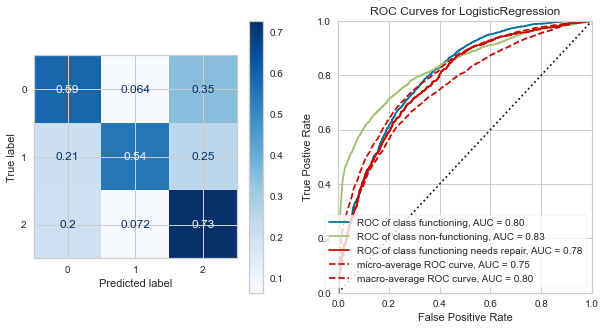

In [131]:
model = eval_classification_model(LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear'), train_resampled, test_scale, 
                 y_train_resampled,y_test)